# ABOVE AC9 Data Processing  

## Checking Sample Replicates - Manually remove poor samples

**Authors:** Catherine Kuhn, Elena Terzić and Anna Simpson

**Last Updated:** September 12th, 2018

### Import libraries

In [1]:
### Import the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import glob
import os
import sys
import csv
from scipy import interpolate
from os import listdir
from os.path import isfile, join
import matplotlib.gridspec as gridspec

### Functions

#### Plots absorption/attenuation for multiple replicates (combination of site_date, filtered/unfiltered, and a/c)

In [95]:
def plotting_absorption(list_of_files, check='F', title='Title'):
    labels_list = []
    count = 0
    for filename in range(len(list_of_files)): 
            count += 10
            df = pd.read_csv(list_of_files[filename], skiprows = 0, delimiter= '\t')         
            df.reset_index(inplace=True, drop=False)
            df.rename(columns = {'c_mean':'mean', 'a_mean':'mean', 'c_std':'std','a_std':'std'}, inplace = True)
            Sensor, Date, Site, Sample_Type, Abs_Type, Rep, T1, T2= list_of_files[filename].split('/')[-1].split('.')[0].split('_')
            repname = 'Rep '+Rep
            labels_list.append(repname)
            plt.plot('wl','mean',data=df,label=repname)
            #plt.scatter('wl', 'a_mean', data = df)
            plt.errorbar('wl', 'mean', yerr='std', fmt='k-', linewidth=0.5, data = df) 
            plt.text(650, df['mean'].mean(), check[list_of_files[filename]]+' '+repname, fontsize=15, color="red")
            if check == 'F':
                pass
            else:
                if 'FLAG' in check[list_of_files[filename]]:
                    plt.text(650, df['mean'].mean(), check[list_of_files[filename]]+' '+repname, fontsize=15, color="red")
    plt.ylabel('a [1/m]')
    plt.title(title)
    plt.legend(labels_list)
    return plt

In [73]:
metadata.head()

,Analysis_Type,Date,ID,Raw_File_Path,Rep,Sample_Type,Sensor,Site,Temp,Cleaned_raw_file_path,Averaged_file_path,Conf
0,a,70718,AC9_070718_sea_cal_a_1_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,1,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.021394
1,a,70718,AC9_070718_sea_cal_a_2_T20_9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,2,cal,AC9,sea,20.9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000588
2,a,70718,AC9_070718_sea_cal_a_3_T20_9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,3,cal,AC9,sea,20.9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000553
3,c,70718,AC9_070718_sea_cal_c_1_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,1,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000296
4,c,70718,AC9_070718_sea_cal_c_2_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,2,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.554332


## Inputs

In [23]:
metadata_updated_filepath = os.path.abspath('..')+'/Metadata/project_metadata_updated.csv'
replicate_directory_name = '2_summary_stats'
replicate_pass_directory_name = '2_summary_stats_pass_manual'

replicate_files_location = os.path.abspath('..')+'/Data/'+replicate_directory_name
replicate_pass_directory_location = os.path.abspath('..')+'/Data/'+replicate_pass_directory_name

In [ ]:
metadata = pd.read_csv(metadata_updated_filepath, skiprows=0, delimiter= '\t')

## Read all file paths into dictionary

#### This loop goes through the rows of the metadata file, creates a dictionary in which the keys are date_site and the entries are dictionaries where the keys are SampleType_AnalysisType (example: fil_a) and the entries are lists of file directories.

In [55]:
metadata = pd.read_csv(metadata_updated_filepath, skiprows=0, delimiter= '\t')
plotting_dict = {}
conf_check = {}
for index, row in metadata.iterrows():
    Site, Date, Analysis_Type, Sample_Type, Averaged_file_path, Conf = row['Site'], row['Date'], row['Analysis_Type'], row['Sample_Type'], row['Averaged_file_path'], row['Conf']
    SiteDate = Site+'_'+str(Date)
    Type = Sample_Type+'_'+Analysis_Type
    conf_check[Averaged_file_path] = Conf
    if SiteDate not in plotting_dict:
        plotting_dict[SiteDate] = {Type:[Averaged_file_path]}
    elif Type not in plotting_dict[SiteDate]:
        plotting_dict[SiteDate][Type] = [Averaged_file_path]
    else:
        plotting_dict[SiteDate][Type].append(Averaged_file_path)
        

In [69]:
from math import exp
for i in conf_check:
    df = pd.read_csv(i, skiprows = 0, delimiter= '\t')
    df.rename(columns = {'c_std':'std','a_std':'std'}, inplace = True)
    mean_std = df['std'].mean()
    if exp(mean_std) > exp(conf_check[i]+1):
        conf_check[i] = 'FLAG'
    else:
        conf_check[i] = ''

fai_71318


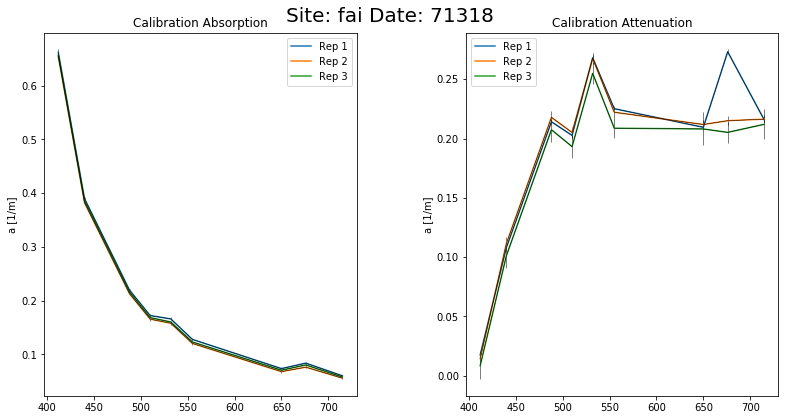

can_71818


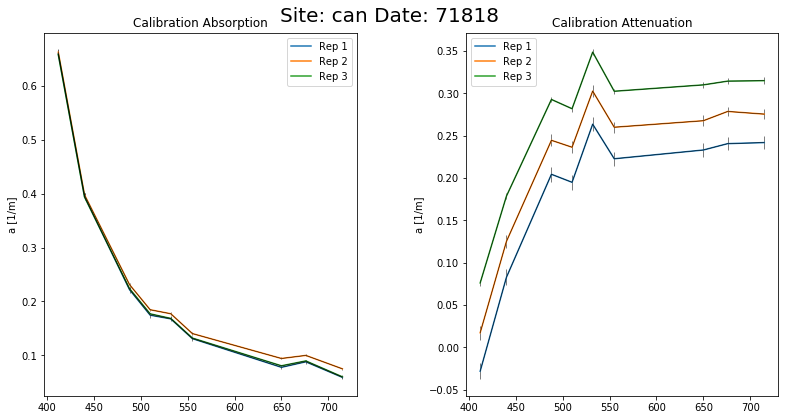

y20_71718


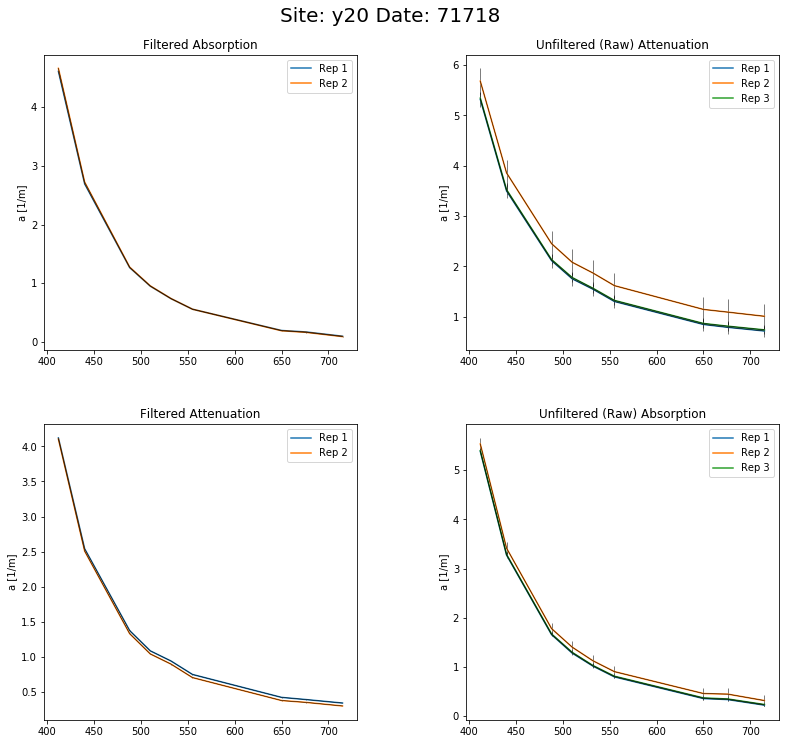

9mi_71718


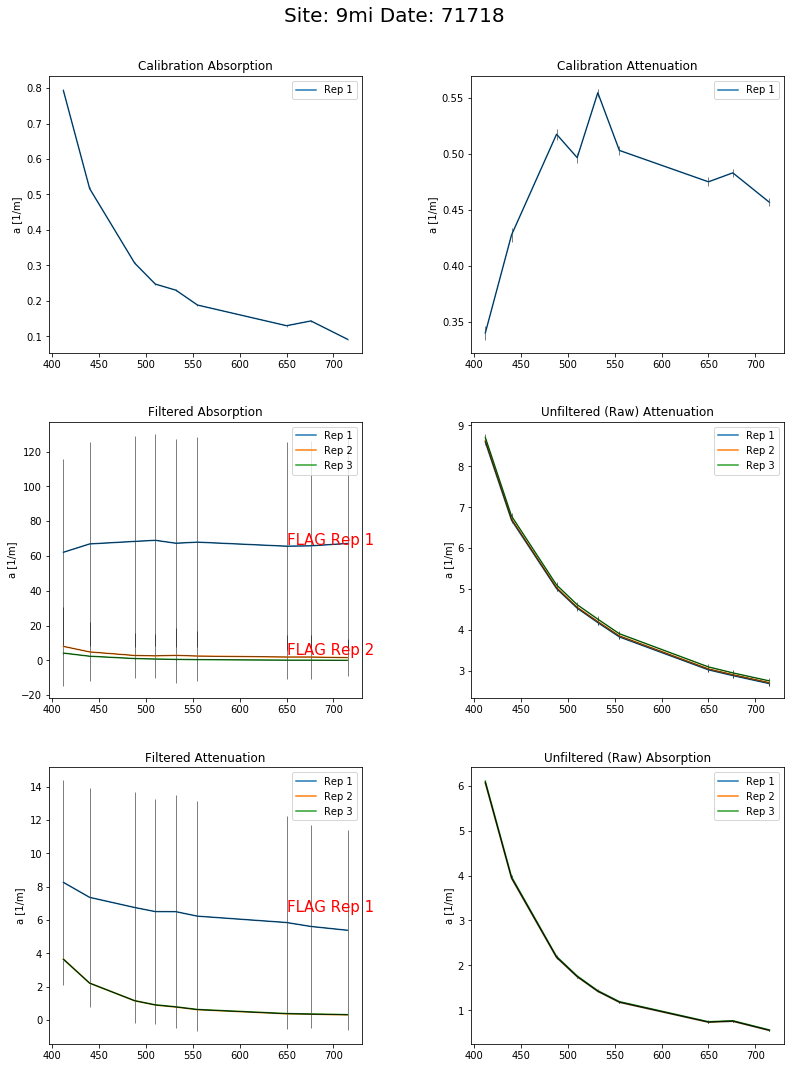

sea_81618


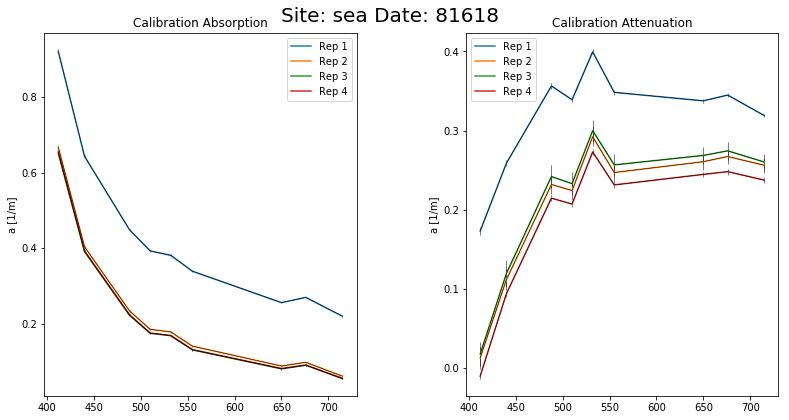

can_71718


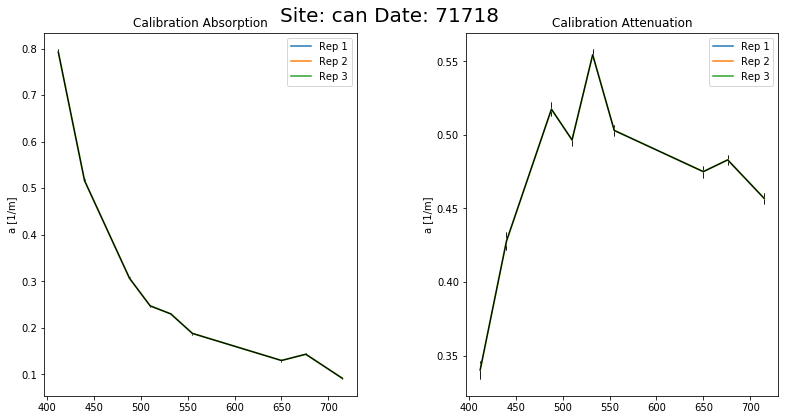

gre_71818


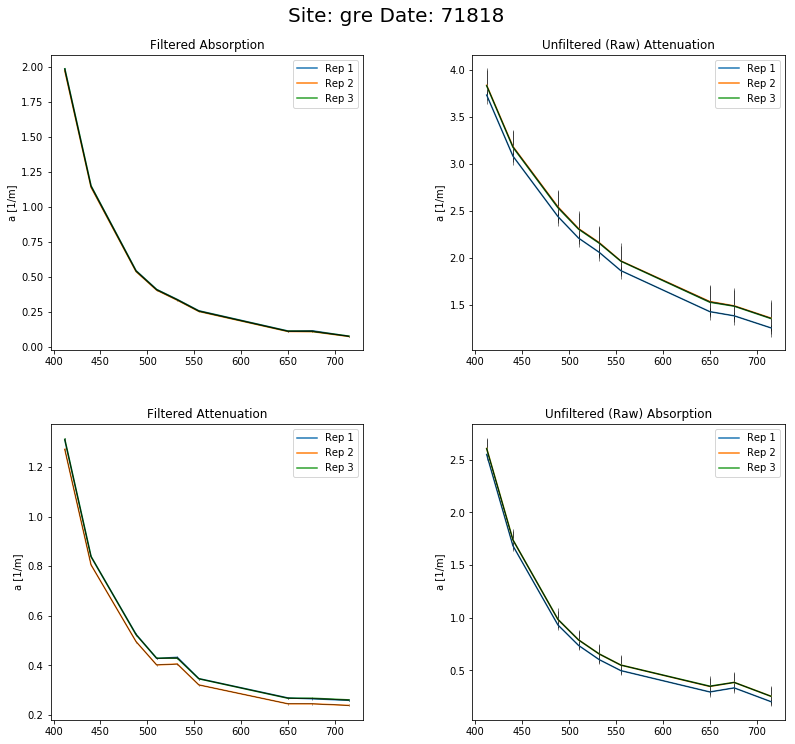

can_71918


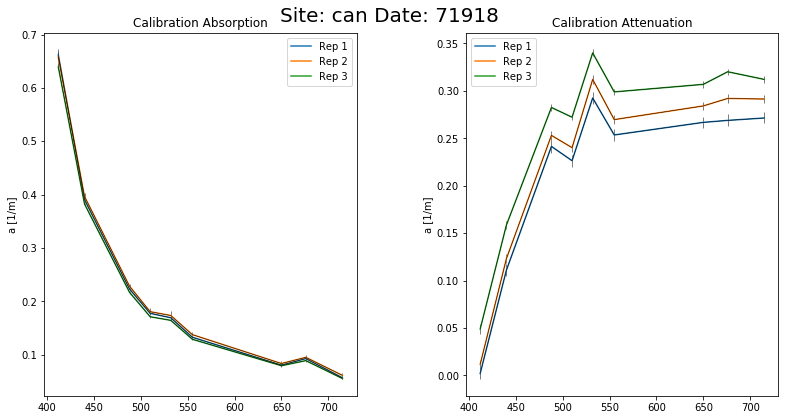

sea_70718


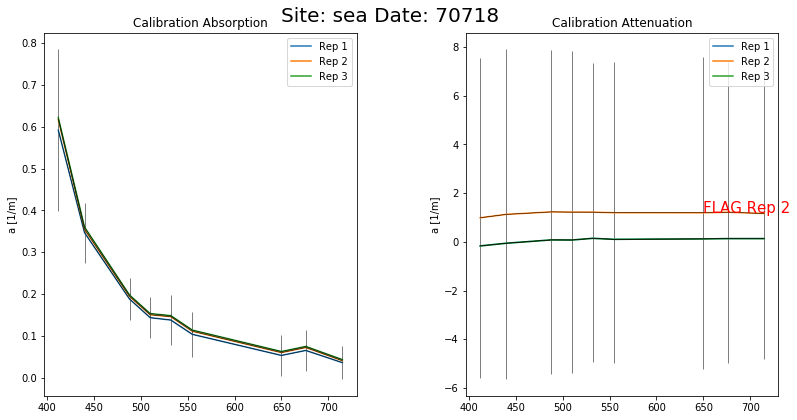

can_71618


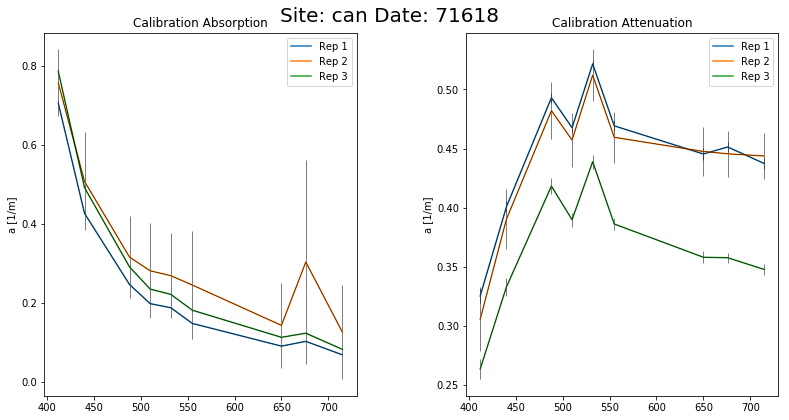

cbr_71618


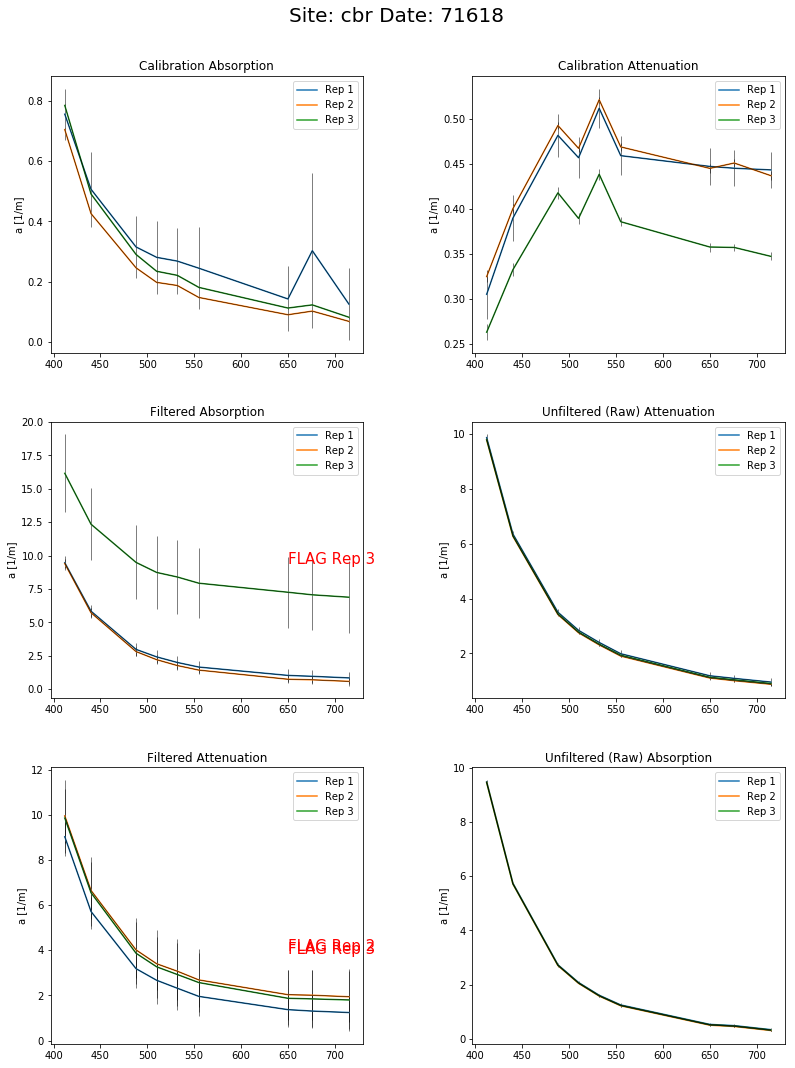

y17_71918


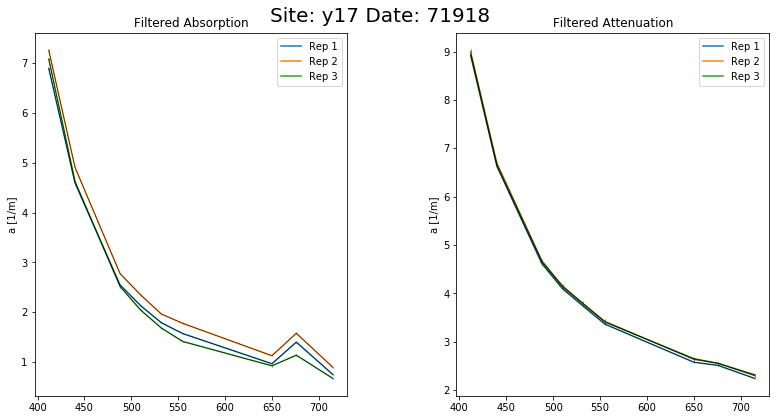

bai_71418


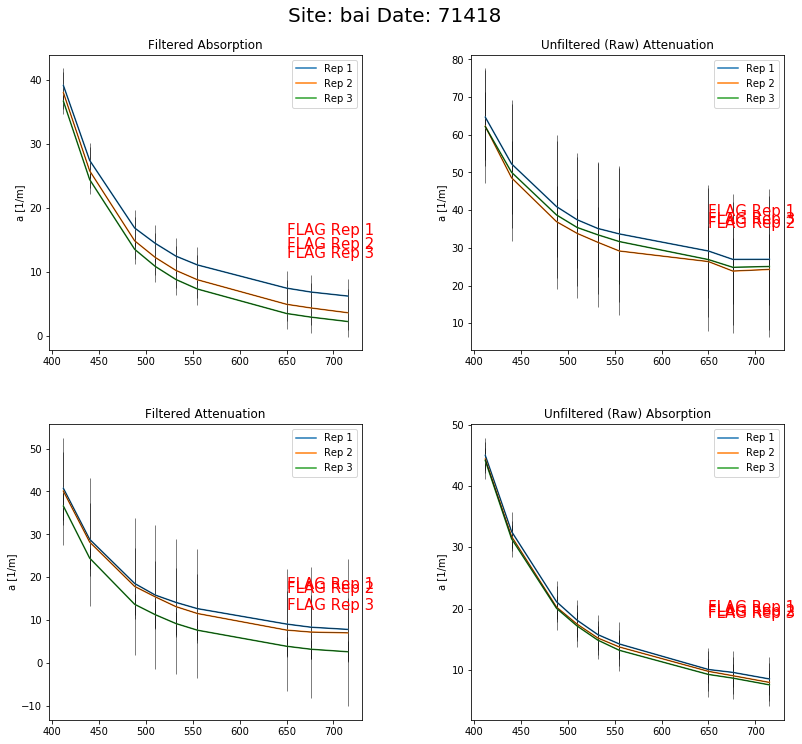

fav_72118


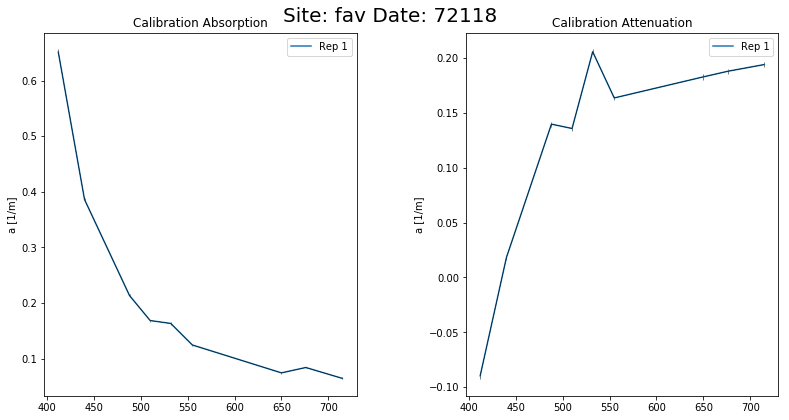

sco_71718


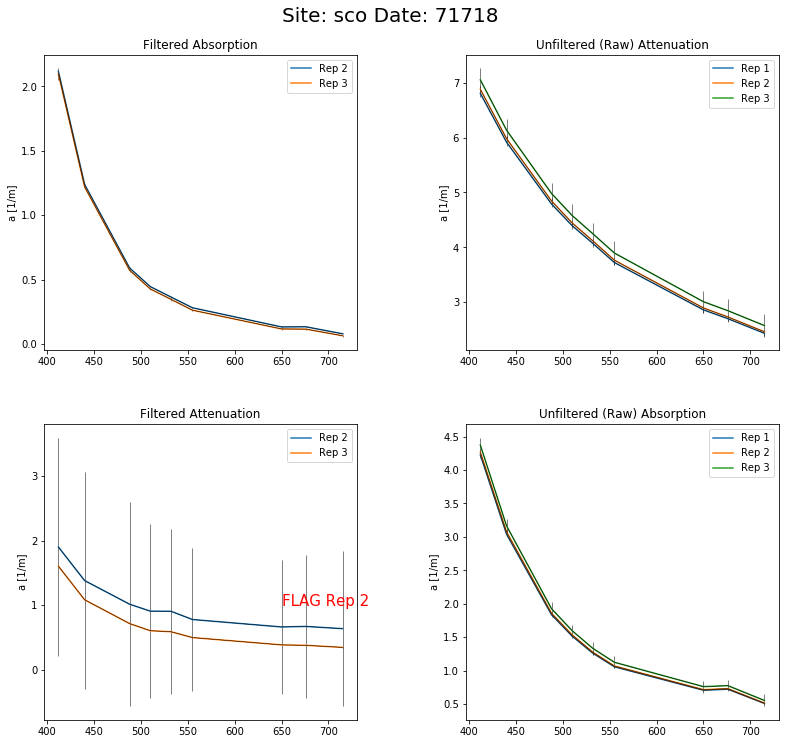

y20_71918


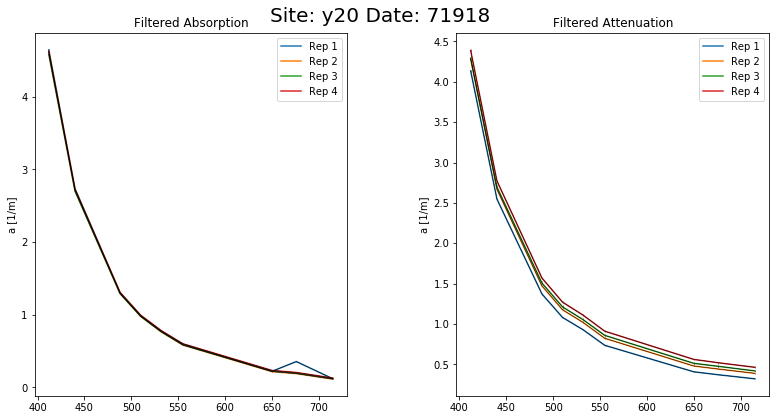

cbr_71918


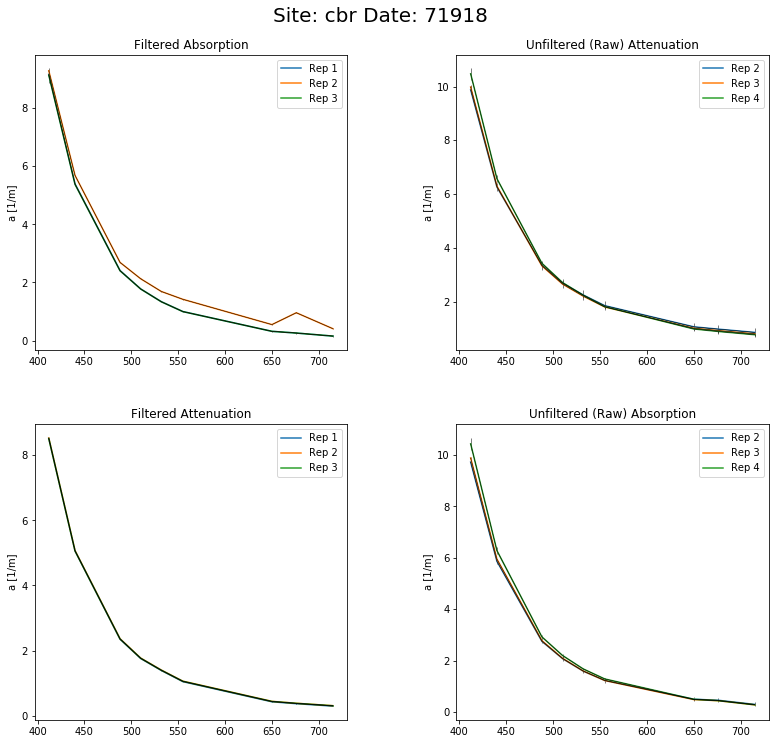

fai_72118


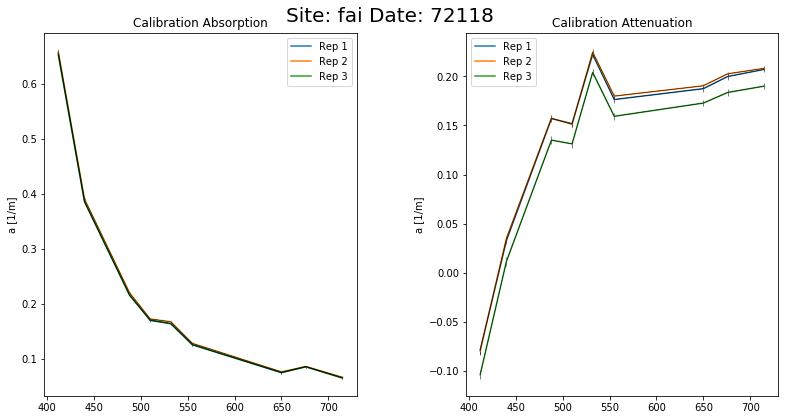

bai_71318


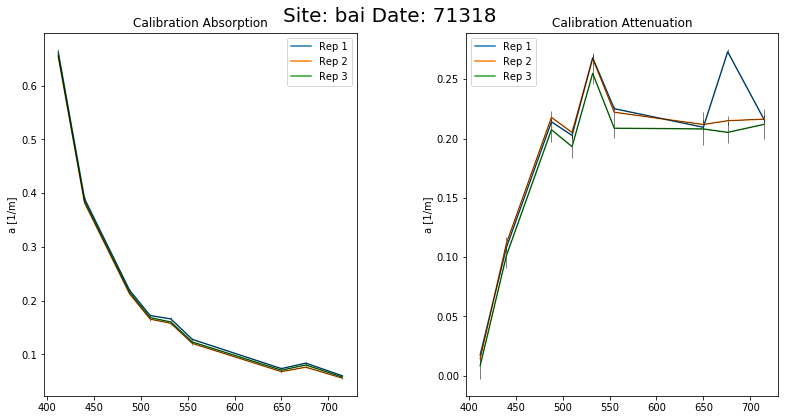

y17_71718


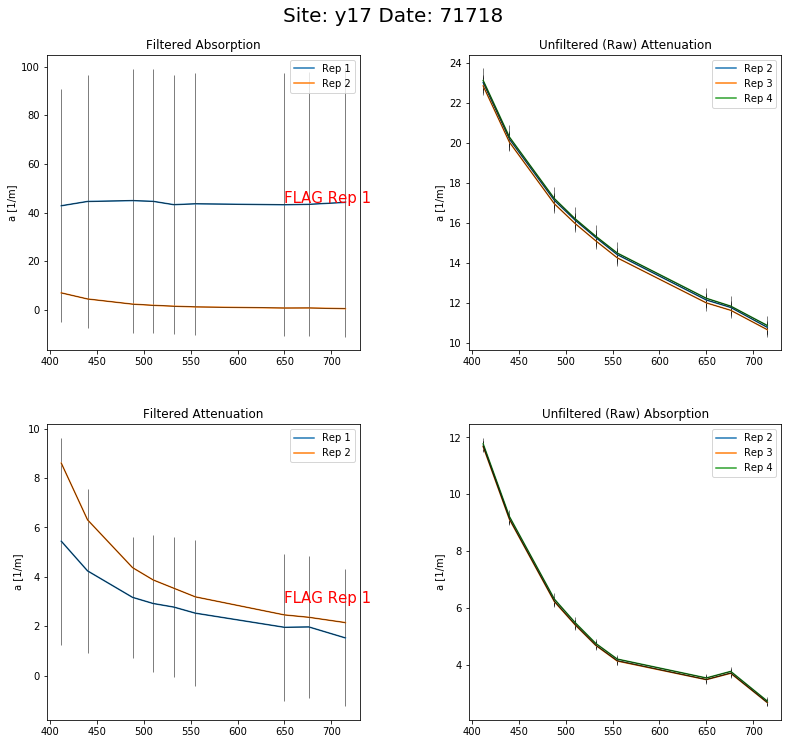

boo_71818


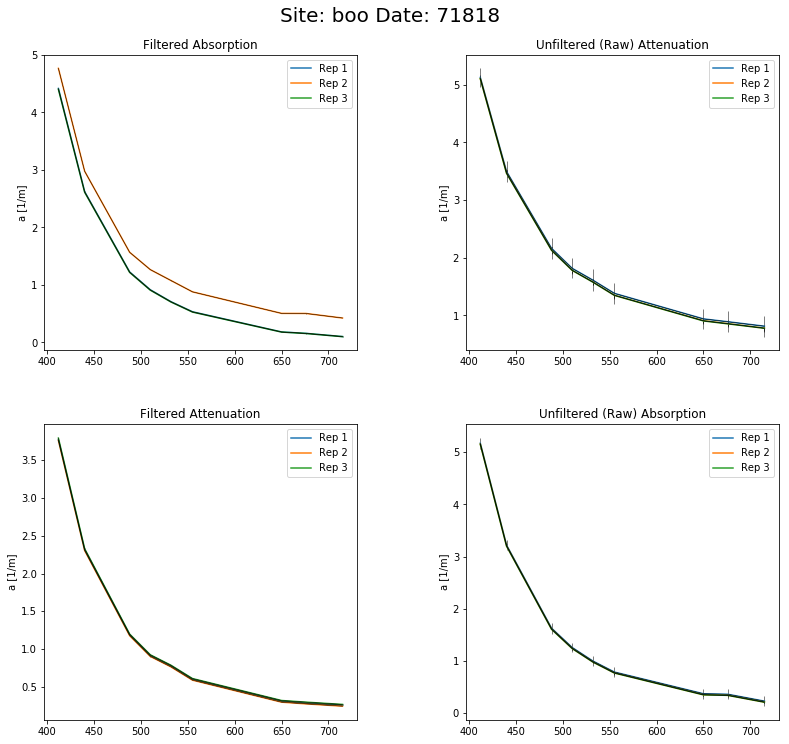

In [99]:
sample_types = {'fil':"Filtered",'raw':'Unfiltered (Raw)','cal':"Calibration"}
abs_types = {'a':'Absorption','c':'Attenuation'}

for i in plotting_dict:
    print i
    num_of_plots = len(plotting_dict[i])
    num_of_rows = num_of_plots/2
    count = 0
    Site_all, Date_all = i.split('_')
    plt.subplots(num_of_rows, 2, figsize=(12, 5*num_of_rows+1))
    for sampleid in plotting_dict[i]:
        count += 1
        Sample_Type, Abs_Type = sampleid.split('_')
        plottitle = ' '.join([sample_types[Sample_Type],abs_types[Abs_Type]])
        plt.subplot(num_of_rows, 2, count)    
        my_plot = plotting_absorption(plotting_dict[i][sampleid], check=conf_check, title=plottitle)
        #dict_of_sampleids_and_plots[sampleid] = my_plot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    my_plot.suptitle('Site: '+Site_all+' '+'Date: '+Date_all, fontsize=20)
    my_plot.show()

## Manual removal

### Function to get sample ids given some information about the samples based on the original metadata categories

** Note: add option (later?) in case multiple sample info variables have identical attributes; i.e. both Rep and Site are described by integers or something. **

** Also Note: here I have Rep and Date coming in as strings. However, one might want sample ids based on a numerical condition as well. Maybe later...**

In [214]:
def get_id(*args):
    list_of_req = [x for x in args]
    metadata_original = pd.read_csv('../Metadata/project_metadata_original.csv', dtype={'Date': object, 'Rep':object}, skiprows=0, delimiter= '\t')
    metadata_original_dict = metadata_original.to_dict('list')
    metadata_original_dict_set = {}
    for i in metadata_original_dict:
        if i == 'ID':
            continue
        else:
            metadata_original_dict_set[i] = [str(k) for k in set(metadata_original_dict[i])]

    #list_of_things
    metadata_original_subset = metadata_original
    total_count = 0
    for m in list_of_req:
        count = 0
        for j in metadata_original_dict_set:
            if m in metadata_original_dict_set[j]:
                count += 1
                total_count += 1
                print j, m
                metadata_original_subset = metadata_original_subset.loc[(metadata_original_subset[j] == m)]
        if count == 0:
            if len(list_of_req) > 1:
                print 'ERROR: Value',m,'not a possible variable. Subsetting by other variables.'
            else:
                print 'ERROR: Value',m,'not a possible variable.'
            break
    if total_count > 0:
        return [i for i in metadata_original_subset['ID']]
    else:
        return 'ERROR'


** Example: **

In [221]:
get_id('y20','071718')

Site y20
Date 071718


['AC9_071718_y20_fil_a_1_T17_0',
 'AC9_071718_y20_fil_a_2_T19_7',
 'AC9_071718_y20_fil_c_1_T17_0',
 'AC9_071718_y20_fil_c_2_T19_7',
 'AC9_071718_y20_raw_a_1_T16_8',
 'AC9_071718_y20_raw_a_2_T16_8',
 'AC9_071718_y20_raw_a_3_T16_8',
 'AC9_071718_y20_raw_c_1_T16_8',
 'AC9_071718_y20_raw_c_2_T16_8',
 'AC9_071718_y20_raw_c_3_T16_8']

In [222]:
metadata_updated = pd.read_csv('../Metadata/project_metadata_updated.csv', dtype={'Date': object, 'Rep':object}, skiprows=0, delimiter= '\t')